In [1]:
from gensim.models.keyedvectors import KeyedVectors
from konlpy.tag import Twitter
import numpy as np
import numpy.linalg as la
import sklearn.decomposition as decomposition
import os
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\blue2\Anaconda3\envs\tensor17\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# 그래프 그릴때 한글을 표시 가능하게 하는 코드.
# os마다 폰트 파일의 위치를 찾아 코드를 고쳐야함.
# window : c:/Windows/Fonts/malgun.ttf
# ubuntu : /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
twitter = Twitter()

def normalize(array):
    norm = la.norm(array)
    return array / norm


def create_word_vector(word, pos_embeddings):
    pos_list = twitter.pos(word, norm=True)
    word_vector = np.sum([pos_embeddings.word_vec(str(pos).replace(" ", "")) for pos in pos_list], axis=0)
    return normalize(word_vector)

In [4]:
pos_file = "./vec/pos_pokewiki.vec"

pos_vectors = KeyedVectors.load_word2vec_format(pos_file, binary=False)
word_embeddings = list()

# word list를 불러온다.
f = open("./word_list.txt", 'r', encoding="UTF8")
words = f.readline().split(" ")
f.close()
        
for word in words[:-1]:
    word_embed = create_word_vector(word, pos_vectors)
    word_embeddings.append(word_embed)

In [5]:
print("저장된 총 단어 : {}".format(np.shape(words)))

저장된 총 단어 : (1661,)


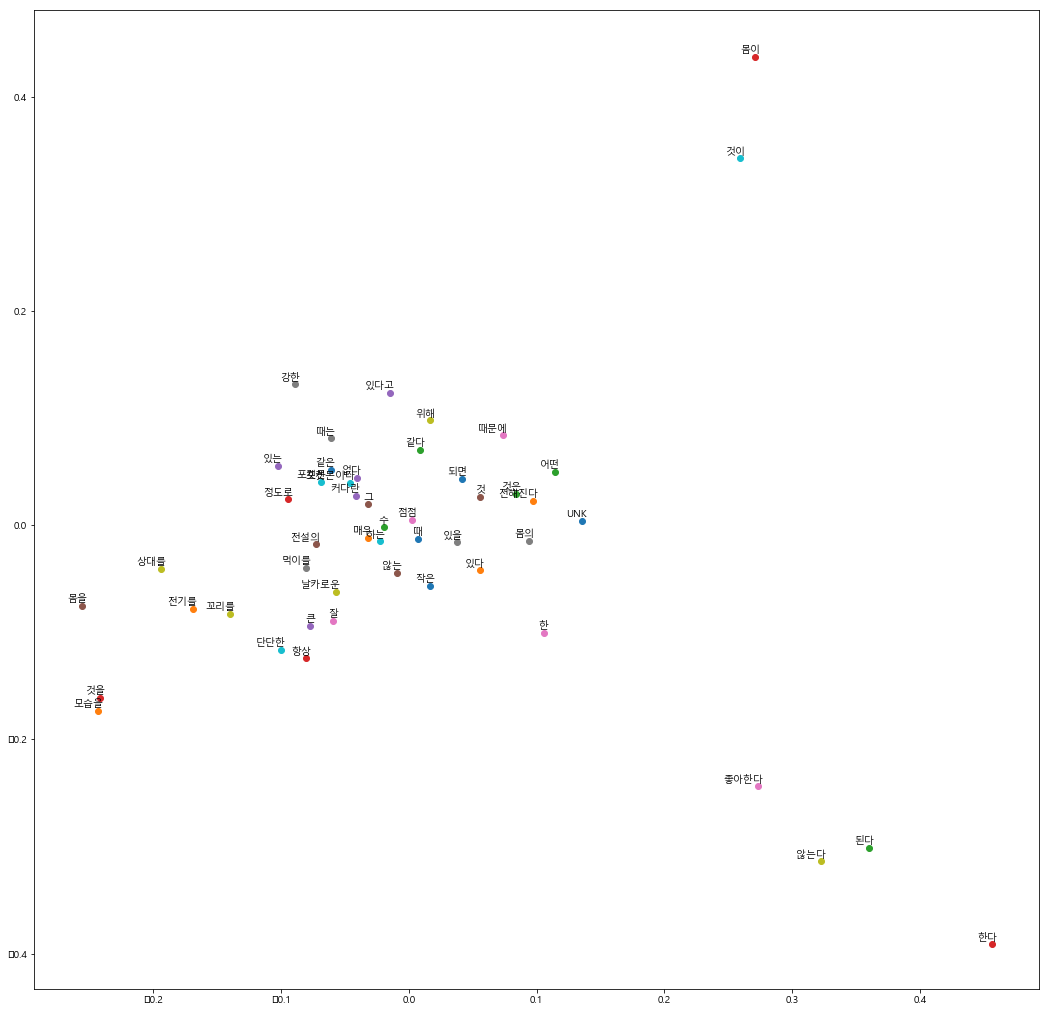

In [6]:
filepath = "./graphs/"
filename = filepath + "output.png"
if not os.path.isdir(filepath):
    os.makedirs(filepath)

embeds = np.array(word_embeddings)
plt.figure(figsize=(18, 18))
pca = decomposition.PCA(n_components=2)
pca.fit(embeds)
Y = pca.transform(embeds)
labels = words[:50] # 불러온 단어 중 일부의 단어만 그래프에 표시
for i, label in enumerate(labels):
    x, y = Y[i, :]
    plt.scatter(x, y)
    plt.annotate(label,
         xy=(x, y),
         xytext=(5, 2),
         textcoords='offset points',
         ha='right',
         va='bottom')
plt.savefig(filename)